In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


def importeer_schone_data(bestandsnaam, kolommen_lijst):
    """
    Leest het databestand in, skipt de metadata en geeft de kolommen namen.
    """
    # sep='\s+' herkent één of meerdere spaties als scheidingsteken
    # skiprows=5 slaat de eerste 5 regels uit het .txt bestand over
    # header=None zorgt ervoor dat de eerste datarij (rij 6) niet als titel wordt gebruikt
    df = pd.read_csv(bestandsnaam, sep='\s+', skiprows=5, header=None)
    
    # Omdat we de originele titels hebben geskipt, geven we ze hier handmatig weer terug
    # Gebaseerd op regel 3, 4 en 5 uit jouw afbeelding:
    geselecteerde_df = df.iloc[:, kolommen_lijst]
    df.columns = ['Time_s', 'element_1_m', 'element_2_m', 'element_3_m', 'element_5_m', 'element_6_m']
    
    return geselecteerde_df, df.columns

importeer_schone_data(r"Data\2026-2-25 SWL Berm 4%.experiment - 180% (4).txt", [0])


<>:13: SyntaxWarning: invalid escape sequence '\s'
<>:13: SyntaxWarning: invalid escape sequence '\s'
C:\Users\929952\AppData\Local\Temp\ipykernel_19156\1894908516.py:13: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv(bestandsnaam, sep='\s+', skiprows=5, header=None)


(                  0
 0          0.000000
 1          0.007812
 2          0.015625
 3          0.023438
 4          0.031250
 ...             ...
 196124  1532.220000
 196125  1532.230000
 196126  1532.230000
 196127  1532.240000
 196128  1532.250000
 
 [196129 rows x 1 columns],
 Index(['Time_s', 'element_1_m', 'element_2_m', 'element_3_m', 'element_5_m',
        'element_6_m'],
       dtype='str'))

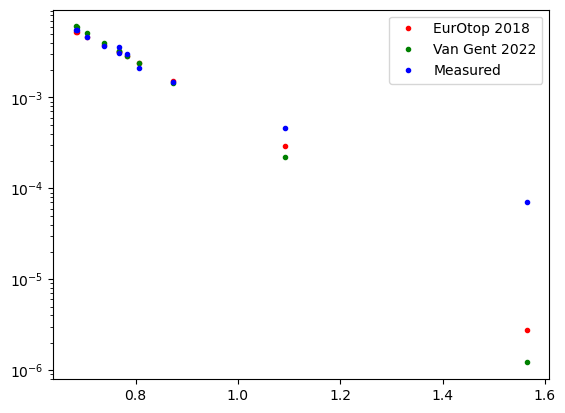

In [175]:
liters = [0.4915, 5.823, 25.379, 43.371, 65.668, 85.431, 77.9415, 97.2455, 135.1147, 177.1345, 171.184]
Hs = [0.07031, 0.1008, 0.126, 0.1362, 0.1404, 0.1433, 0.1434, 0.1488, 0.1561, 0.1606, 0.161]
simulation_time = [1189.06, 1251.53, 1233.06, 1320.94, 1342.81, 1415.75, 1470.94, 1458.59, 1521.81, 1597.41, 1532.25]

q = np.zeros(len(Hs))
q_stars = np.zeros(len(Hs))
Rc_Hm0_24_2 = np.zeros(len(Hs))
Rc_Hm0_25_2 = np.zeros(len(Hs))

Rc24_2 = 0.1146 # 60% tm 110%
Rc25_2 = 0.1166 # 120% tm 180%

for i in range(len(Hs)):
    g = 9.81
    q[i] = liters[i] * 10 /(1000*simulation_time[i])
    q_stars[i] = (q[i])/((g*Hs[i]**3)**0.5)
    Rc_Hm0_24_2[i] = Rc24_2 / Hs[i]
    Rc_Hm0_25_2[i] = Rc25_2 / Hs[i]


q_expected_EurOtop_24_2 = [0.00000279860242, 0.000288793405, 0.0015322317, 0.00240013879]
q_expected_VanGent2022_24_2 = [0.00000121687189, 0.000223043549, 0.00143970056, 0.00239959383]

q_expected_EurOtop_25_2 = [0.00281688844, 0.00312376651, 0.00313461916, 0.00374645623, 0.00464897475, 0.00524438476, 0.0052986409]
q_expected_VanGent2022_25_2 = [0.00288394706, 0.00324929105, 0.00326234071, 0.00401170449, 0.00516320092, 0.00595089835, 0.00602373714]

q_expected_EurOtop = np.append(q_expected_EurOtop_24_2, q_expected_EurOtop_25_2)
q_expected_VanGent2022 = np.append(q_expected_VanGent2022_24_2, q_expected_VanGent2022_25_2)

plt.plot(Rc_Hm0, q_expected_EurOtop, '.', color = "red", label = "EurOtop 2018")
plt.plot(Rc_Hm0, q_expected_VanGent2022, '.', color = "green", label = "Van Gent 2022")
plt.plot(Rc_Hm0, q_stars, '.', color = "blue", label = "Measured")
plt.legend()
plt.yscale("log")



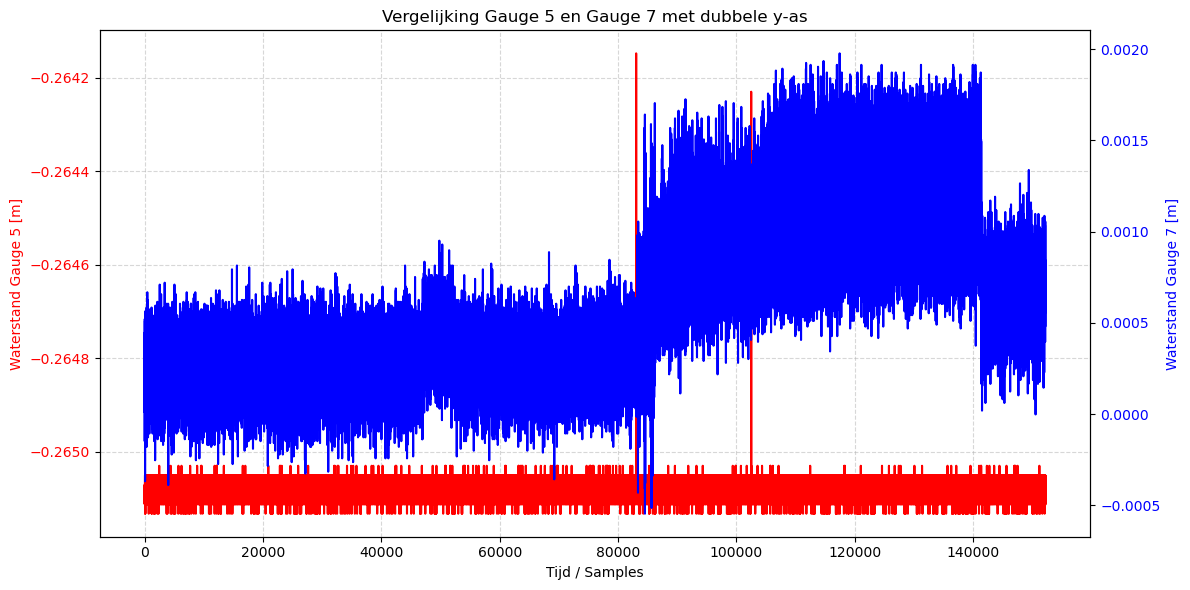

In [178]:
#Gauge 5

gauge5, _ = importeer_schone_data(r"Data\2026-2-24 SWL Berm 4%.experiment - 60% (4).txt", [4])
gauge7, _ = importeer_schone_data(r"Data\2026-2-24 SWL Berm 4%.experiment - 60% (4).txt", [5])

# 1. Maak de figuur en de eerste as (links) aan
fig, ax1 = plt.subplots(figsize=(12, 6))

# 2. Plot gauge5 op de linker-as
ax1.plot(gauge5, color="red", label="Gauge 5 (Links)")
ax1.set_xlabel("Tijd / Samples")
ax1.set_ylabel("Waterstand Gauge 5 [m]", color="red")
ax1.tick_params(axis='y', labelcolor="red")

# 3. Maak de tweede as aan (rechts) die de x-as deelt
ax2 = ax1.twinx()

# 4. Plot gauge7 op de rechter-as
ax2.plot(gauge7, color="blue", label="Gauge 7 (Rechts)")
ax2.set_ylabel("Waterstand Gauge 7 [m]", color="blue")
ax2.tick_params(axis='y', labelcolor="blue")

# Optioneel: Titel en grid
plt.title("Vergelijking Gauge 5 en Gauge 7 met dubbele y-as")
ax1.grid(True, which='both', linestyle='--', alpha=0.5)

# Zorgt dat de labels niet worden afgesneden
fig.tight_layout()

plt.show()

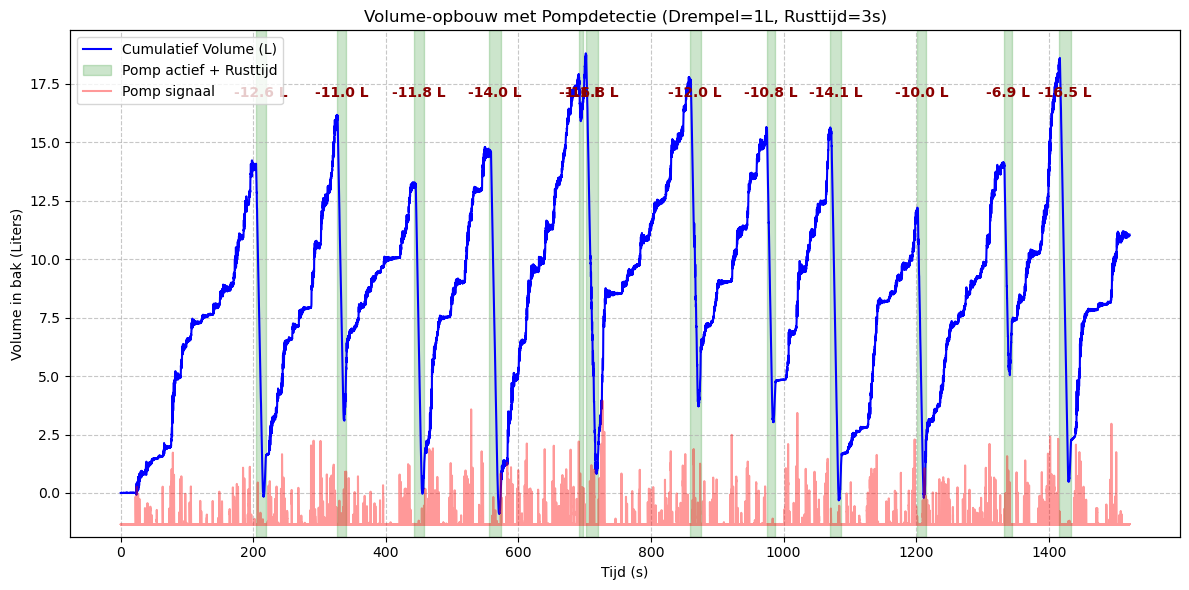

--> Functie gereed. Er zijn 12 pompmomenten gedetecteerd (>1L).
--> Totaal overgeslagen volume (met pompcorrectie van +137.7L): 148.72 Liter


In [249]:
#Overtopping box to volumes

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


data,alles = importeer_schone_data(r"Data\2026-2-25 SWL Berm 4%.experiment - 160% (4).txt", [0,4,5])



def bereken_bak_volume_pomp(data, T_golf, pomp_drempel_L, rusttijd_s):
    """
    Berekent het stapsgewijze volume in een bak, detecteert pompmomenten
    en plot tegelijkertijd een indicatief signaal (data[4]) aan de onderkant.
    """
    # --- Vaste parameters ---
    fs = 128           # [Hz] Vaste sampling rate
    lengte_bak = 0.37  # [m]
    breedte_bak = 0.22 # [m]
    
    oppervlakte_pomp = ((0.07/2)**2)*np.pi
    oppervlakte = lengte_bak * breedte_bak - oppervlakte_pomp

    # --- 1. Data inlezen (inclusief het signaal!) ---
    df = pd.DataFrame({
        'Tijd': data[0],
        'Waterstand': data[5],
        'Signaal': data[4]  # <-- Hier voegen we het extra signaal toe
    })
    
    # --- 2. Smoothing (1/4 golfperiode) ---
    window_size = int(0.25 * T_golf * fs)
    df['Waterstand_smooth'] = df['Waterstand'].rolling(window=window_size, center=True).mean().bfill().ffill()
    
    # --- 3. Volume Berekening ---
    df['Volume_L'] = (df['Waterstand_smooth'] - df['Waterstand_smooth'].iloc[0]) * oppervlakte * 1000 
    
    # --- 4. POMP DETECTIE ---
    window_pomp = int(1.5 * T_golf * fs)
    df['Volume_pomp_smooth'] = df['Volume_L'].rolling(window_pomp, center=True).mean().bfill().ffill()
    
    df['dV'] = df['Volume_pomp_smooth'].diff(fs).fillna(0)
    
    is_dropping = df['dV'] < -0.5 
    df['pump_group'] = (~is_dropping).cumsum()
    
    pump_events = []
    totale_pomp_correctie = 0
    
    for name, group in df[is_dropping].groupby('pump_group'):
        if len(group) == 0:
            continue
            
        idx_start = group.index[0]
        idx_end = group.index[-1]
        
        zoek_start = max(0, idx_start - 3 * fs)
        real_start_idx = df['Volume_pomp_smooth'].iloc[zoek_start:idx_start+1].idxmax()
        
        zoek_eind = min(len(df) - 1, idx_end + 3 * fs)
        real_end_idx_steep = df['Volume_pomp_smooth'].iloc[idx_end:zoek_eind+1].idxmin()
        
        idx_na_rust = min(len(df) - 1, real_end_idx_steep + int(rusttijd_s * fs))
        
        vol_start = df['Volume_pomp_smooth'].loc[real_start_idx]
        vol_na_rust = df['Volume_pomp_smooth'].loc[idx_na_rust]
        vol_drop = vol_start - vol_na_rust
        
        if vol_drop >= pomp_drempel_L:
            t_start = df['Tijd'].loc[real_start_idx]
            t_end = df['Tijd'].loc[idx_na_rust] 
            
            if pump_events and real_start_idx <= pump_events[-1]['end_idx']:
                 pump_events[-1]['end_idx'] = max(pump_events[-1]['end_idx'], idx_na_rust)
                 pump_events[-1]['t_end'] = df['Tijd'].loc[pump_events[-1]['end_idx']]
                 pump_events[-1]['drop'] = df['Volume_pomp_smooth'].loc[pump_events[-1]['start_idx']] - df['Volume_pomp_smooth'].loc[pump_events[-1]['end_idx']]
            else:
                pump_events.append({
                    'start_idx': real_start_idx,
                    'end_idx': idx_na_rust,
                    't_start': t_start,
                    't_end': t_end,
                    'drop': vol_drop
                })

    totale_pomp_correctie = sum(ev['drop'] for ev in pump_events)
    totaal_volume = df['Volume_L'].iloc[-1] + totale_pomp_correctie

    # --- 5. Visualisatie ---
    fig, ax1 = plt.subplots(figsize=(12, 6))
    
    # Plot het volume op de linkeras (ax1)
    ax1.plot(df['Tijd'], df['Volume_L'], label='Cumulatief Volume (L)', color='blue')
    
    # Kleur de pompmomenten in
    for i, event in enumerate(pump_events):
        label = 'Pomp actief + Rusttijd' if i == 0 else "" 
        ax1.axvspan(event['t_start'], event['t_end'], color='green', alpha=0.2, label=label)
        
        mid_t = (event['t_start'] + event['t_end']) / 2
        y_pos = df['Volume_L'].max() * 0.9
        ax1.text(mid_t, y_pos, f"-{event['drop']:.1f} L", color='darkred', ha='center', fontweight='bold')
    
    ax1.set_xlabel('Tijd (s)')
    ax1.set_ylabel('Volume in bak (Liters)')
    ax1.grid(True, linestyle='--', alpha=0.7)

    # --- EXTRA SIGNAAL PLOTTEN (Rechteras) ---
    ax2 = ax1.twinx()  # Tweede as aanmaken
    ax2.plot(df['Tijd'], df['Signaal'], color="red", alpha=0.4, label='Pomp signaal')
    
    # Haal de getallen weg zodat het puur een indicatie is
    ax2.set_yticks([])
    
    # Push het signaal naar de bodem door de as bovenaan heeeel lang te maken
    sig_min = df['Signaal'].min()
    sig_max = df['Signaal'].max()
    sig_range = sig_max - sig_min if sig_max != sig_min else 1
    # Door er + (3 * sig_range) bij te doen, dwingen we de lijn naar de onderste ~25% van de grafiek
    ax2.set_ylim(sig_min - 0.1 * sig_range, sig_max + 3 * sig_range)

    # Legenda's samenvoegen
    lines_1, labels_1 = ax1.get_legend_handles_labels()
    lines_2, labels_2 = ax2.get_legend_handles_labels()
    ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

    plt.title(f'Volume-opbouw met Pompdetectie (Drempel={pomp_drempel_L}L, Rusttijd={rusttijd_s}s)')
    plt.tight_layout()
    plt.show()
    
    print(f"--> Functie gereed. Er zijn {len(pump_events)} pompmomenten gedetecteerd (>{pomp_drempel_L}L).")
    print(f"--> Totaal overgeslagen volume (met pompcorrectie van +{totale_pomp_correctie:.1f}L): {totaal_volume:.2f} Liter")
    
    return df, totaal_volume

# --- AANROEPEN ---
df_resultaten, totaal = bereken_bak_volume_pomp(data, T_golf=1, pomp_drempel_L=1, rusttijd_s=3)


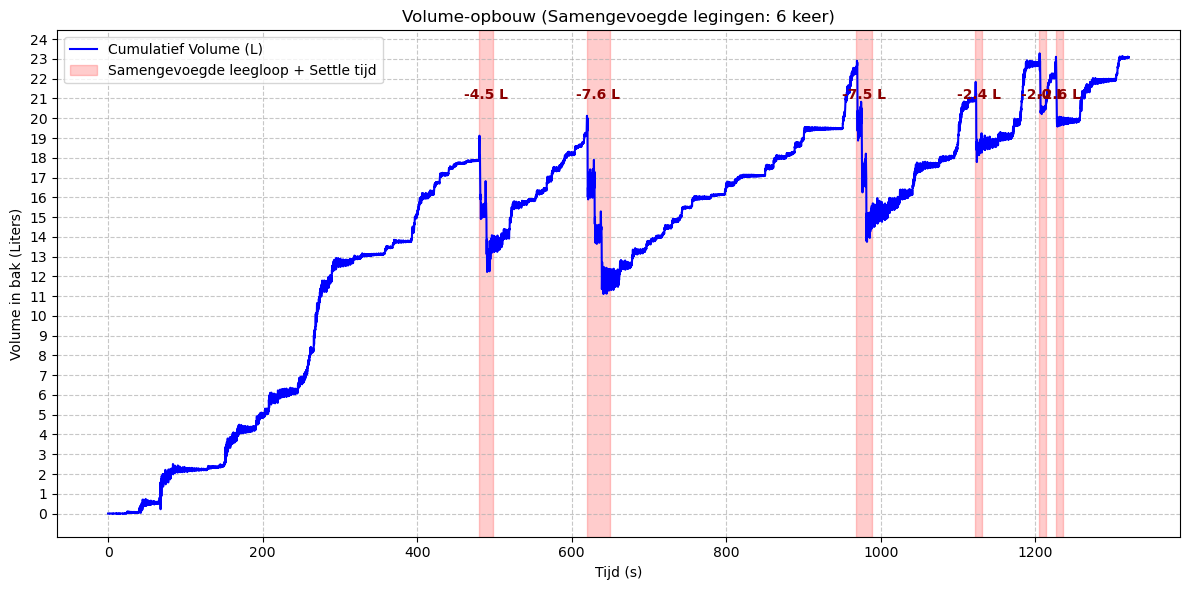

--> TOTAAL AANTAL SAMENGEVOEGDE LEGINGEN: 6
--> TOTAAL OVERGESLAGEN VOLUME: 49.74 Liter


In [212]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def bereken_bak_volume_handmatig(data, T_golf, pomp_drempel_L=10, rusttijd_s=3.0, samenvoeg_tijd_s=7.0):
    """
    Berekent het stapsgewijze volume, detecteert handmatige leegloop,
    voegt extracties binnen 'samenvoeg_tijd_s' samen tot één actie,
    en wacht pas op het einde 'rusttijd_s' seconden om het werkelijke
    weggehaalde volume af te lezen.
    """
    # --- Vaste parameters ---
    fs = 128           
    lengte_bak = 0.37  
    breedte_bak = 0.22 
    oppervlakte = lengte_bak * breedte_bak

    # --- 1. Data inlezen ---
    df = pd.DataFrame({
        'Tijd': data[0],
        'Waterstand': data[5]
    })
    
    # --- 2. Smoothing (1/4 golfperiode) ---
    window_size = int(0.25 * T_golf * fs)
    df['Waterstand_smooth'] = df['Waterstand'].rolling(window=window_size, center=True).mean().bfill().ffill()
    df['Volume_L'] = (df['Waterstand_smooth'] - df['Waterstand_smooth'].iloc[0]) * oppervlakte * 1000 
    
    # --- 3. POMP / HANDMATIG LEEGMAKEN DETECTIE ---
    window_pomp = int(1.5 * T_golf * fs)
    df['Volume_pomp_smooth'] = df['Volume_L'].rolling(window=window_pomp, center=True).mean().bfill().ffill()
    
    df['dV'] = df['Volume_pomp_smooth'].diff(fs).fillna(0)
    
    is_dropping = df['dV'] < -0.5 
    df['pump_group'] = (~is_dropping).cumsum()
    
    ruwe_events = []
    
    # Stap A: Verzamel alle losse, ruwe dalingen
    for name, group in df[is_dropping].groupby('pump_group'):
        if len(group) == 0:
            continue
            
        idx_start = group.index[0]
        idx_end = group.index[-1]
        
        # Lokale piek (start) en dal (einde van de steile beweging)
        zoek_start = max(0, idx_start - 3 * fs)
        real_start_idx = df['Volume_pomp_smooth'].iloc[zoek_start:idx_start+1].idxmax()
        
        zoek_eind = min(len(df) - 1, idx_end + 3 * fs)
        real_end_idx_steep = df['Volume_pomp_smooth'].iloc[idx_end:zoek_eind+1].idxmin()
        
        ruwe_events.append({
            'start_idx': real_start_idx,
            'end_idx': real_end_idx_steep,
            't_start': df['Tijd'].loc[real_start_idx],
            't_end': df['Tijd'].loc[real_end_idx_steep]
        })

    # Stap B: Voeg dalingen samen die binnen de samenvoeg_tijd (7s) vallen
    gecombineerde_events = []
    
    for ev in ruwe_events:
        if not gecombineerde_events:
            gecombineerde_events.append(ev.copy())
        else:
            vorige_ev = gecombineerde_events[-1]
            tijd_verschil = ev['t_start'] - vorige_ev['t_end']
            
            # Als de daling snel genoeg volgt op de vorige, plakken we ze aan elkaar
            if tijd_verschil <= samenvoeg_tijd_s:
                vorige_ev['end_idx'] = ev['end_idx']
                vorige_ev['t_end'] = ev['t_end']
            else:
                gecombineerde_events.append(ev.copy())

    # Stap C: Voeg de rusttijd toe aan het EINDE van elk samengevoegd blok en bereken volume
    pump_events = []
    for ev in gecombineerde_events:
        # Voeg rusttijd toe ná de allerlaatste extractie van dit blok
        idx_na_rust = min(len(df) - 1, ev['end_idx'] + int(rusttijd_s * fs))
        
        vol_start = df['Volume_pomp_smooth'].loc[ev['start_idx']]
        vol_na_rust = df['Volume_pomp_smooth'].loc[idx_na_rust]
        vol_drop = vol_start - vol_na_rust
        
        if vol_drop >= pomp_drempel_L:
            pump_events.append({
                'start_idx': ev['start_idx'],
                'end_idx': idx_na_rust, # We overschrijven het eindpunt inclusief rusttijd voor de plot
                't_start': ev['t_start'],
                't_end': df['Tijd'].loc[idx_na_rust], # De rode strook loopt dus door tot NA de rusttijd
                'drop': vol_drop
            })

    # Totalen berekenen
    totale_pomp_correctie = sum(ev['drop'] for ev in pump_events)
    aantal_legingen = len(pump_events)
    
    # --- 4. Totaal Volume Berekenen ---
    totaal_volume = df['Volume_L'].iloc[-1] + totale_pomp_correctie

    # --- 5. Visualisatie ---
    plt.figure(figsize=(12, 6))
    plt.plot(df['Tijd'], df['Volume_L'], label='Cumulatief Volume (L)', color='blue')
    
    for i, event in enumerate(pump_events):
        label = 'Samengevoegde leegloop + Settle tijd' if i == 0 else "" 
        plt.axvspan(event['t_start'], event['t_end'], color='red', alpha=0.2, label=label)
        
        mid_t = (event['t_start'] + event['t_end']) / 2
        y_pos = df['Volume_L'].max() * 0.9
        plt.text(mid_t, y_pos, f"-{event['drop']:.1f} L", color='darkred', ha='center', fontweight='bold')
    
    plt.xlabel('Tijd (s)')
    plt.ylabel('Volume in bak (Liters)')
    plt.yticks(np.arange(0,25,1))
    plt.title(f'Volume-opbouw (Samengevoegde legingen: {aantal_legingen} keer)')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend(loc='upper left')
    plt.tight_layout()
    plt.show()

    print(f"--> TOTAAL AANTAL SAMENGEVOEGDE LEGINGEN: {aantal_legingen}")
    print(f"--> TOTAAL OVERGESLAGEN VOLUME: {totaal_volume:.2f} Liter")
    
    return df, totaal_volume, aantal_legingen


df_result, eind_volume, legingen = bereken_bak_volume_handmatig(
    data, 
    T_golf=1.5, 
    pomp_drempel_L=1.5, 
    rusttijd_s=6.0, 
    samenvoeg_tijd_s=7.0
)